In [125]:
import pandas as pd

In [126]:
calorie_data = pd.read_csv('/content/calories.csv')
calorie_data = calorie_data.drop('User_ID' , axis = 1)

calorie_data.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [127]:
excercise_data = pd.read_csv('/content/exercise.csv')
# excercise_data.drop('User_ID' , inplace =True)
excercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [128]:
frames = [excercise_data , calorie_data]
df = pd.concat(frames , axis =1)

In [129]:
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [130]:
df.shape

(15000, 9)

In [131]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


CHECKING CORRELATIONS

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

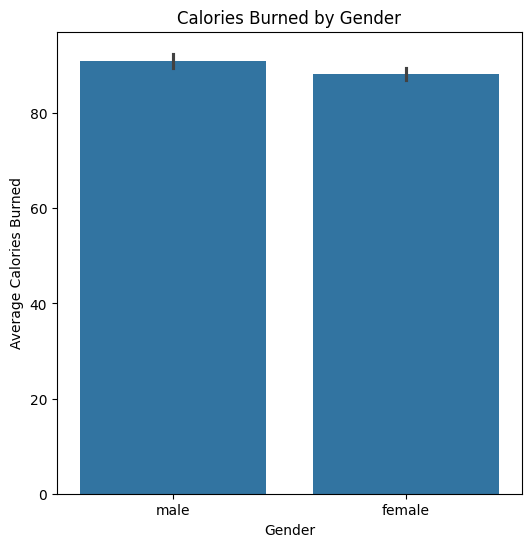

In [133]:
plt.figure(figsize=(6, 6))
sns.barplot(x='Gender', y='Calories', data=df)
plt.xlabel('Gender')
plt.ylabel('Average Calories Burned')
plt.title('Calories Burned by Gender')
plt.show()

<ipython-input-134-ce4527e9b120>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

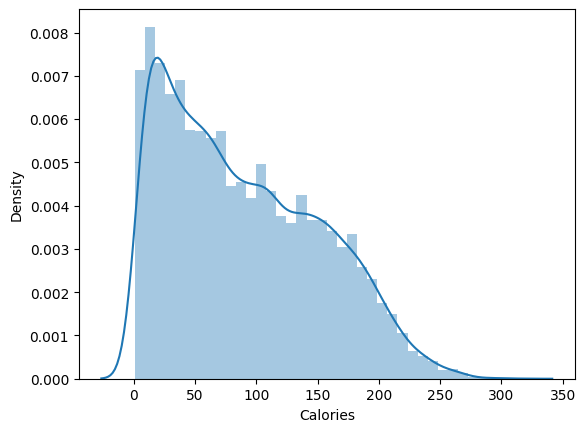

In [134]:
sns.distplot(df['Calories'])

<ipython-input-135-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

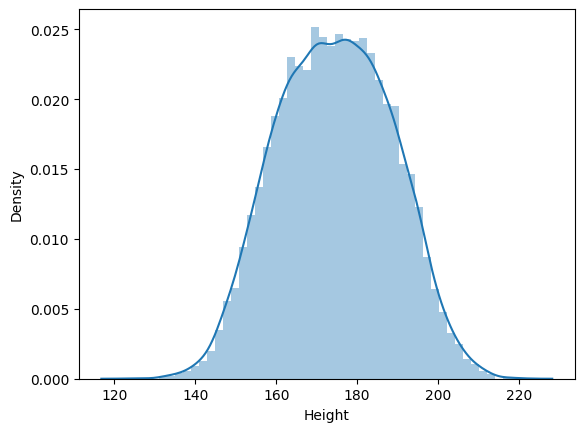

In [135]:
sns.distplot(df['Height'])

<ipython-input-136-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

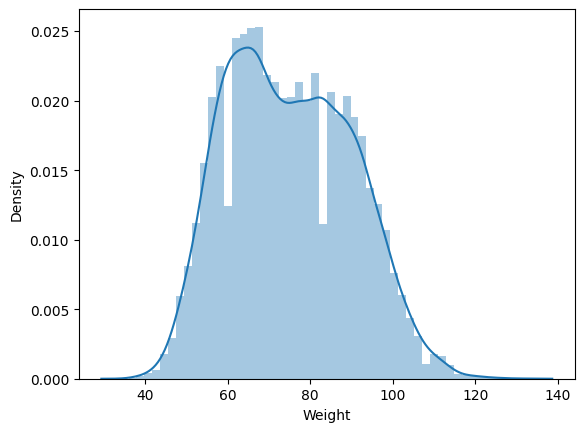

In [136]:
sns.distplot(df['Weight'])

Finding Correlation in dataset

In [137]:
corr = df.drop('Gender' , axis =1 )

In [138]:
correlation = corr.corr()

<Axes: >

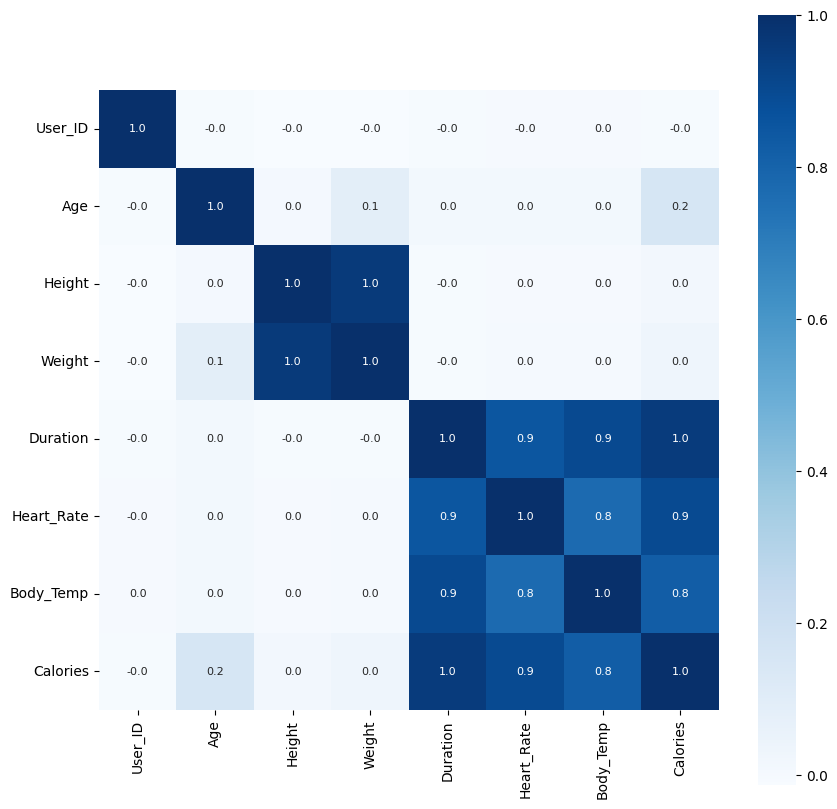

In [139]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [140]:
# on hot encoding on gender
df.replace(
    {'Gender' : {'male' :0 , 'female':1}} , inplace =True
)

In [141]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [142]:
x = df.drop('Calories' , axis = 1)
y = df['Calories']

In [143]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=2)

In [144]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(12000, 8) (3000, 8) (12000,) (3000,)


In [145]:
from xgboost import XGBRegressor

In [146]:
model_train = XGBRegressor()
model_train

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [147]:
model_train.fit(x_train , y_train)
model_train_pred = model_train.predict(x_train)
print(model_train_pred)

[ 11.742706  37.242317  31.318651 ... 107.154564 179.42761   44.831123]


In [148]:
from sklearn.metrics import mean_absolute_error
score_train = mean_absolute_error(y_train,model_train_pred)
print(score_train)

0.9740070718588928


In [149]:
model_test = XGBRegressor()
model_test

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [150]:
model_test.fit(x_test , y_test)
model_test_pred = model_test.predict(x_test)
print(model_test_pred)

[126.09289  223.96239   37.19901  ... 145.29454   23.287403  89.990456]


In [151]:
score_test = mean_absolute_error(y_test,model_test_pred )
print(score_test)

0.5570843168497086
